## Gridded dataset Eploratory Analysis
Confirm Path and Open the 2024 File
Since the file is there, let's confirm the path and open it in your Jupyter notebook:

In [7]:
import xarray as xr
import os
import cftime

# Define the path to the 2024 file
# nc_file = "/home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2024.monthly_rain.nc"
nc_file = "/home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/monthly_rain/2024.monthly_rain.nc"
# Check if file exist

if not os.path.exists(nc_file):
    print(f"❌ File not found: {nc_file}")
else:
    print(f"✅ File found: {nc_file}")

    # Open the NetCDF file without automatic time decoding
    dataset = xr.open_dataset(nc_file)
    
    # Display dataset information
    print(dataset)
    print(dataset["time"])
    print("\nTime Metadata:", dataset["time"].attrs)
    
   

✅ File found: /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/monthly_rain/2024.monthly_rain.nc
<xarray.Dataset> Size: 55MB
Dimensions:       (lat: 681, lon: 841, time: 12)
Coordinates:
  * lat           (lat) float64 5kB -44.0 -43.95 -43.9 ... -10.1 -10.05 -10.0
  * lon           (lon) float64 7kB 112.0 112.0 112.1 ... 153.9 153.9 154.0
  * time          (time) datetime64[ns] 96B 2024-01-16T12:00:00 ... 2024-12-1...
Data variables:
    monthly_rain  (time, lat, lon) float64 55MB ...
    crs           |S1 1B ...
Attributes:
    department:               Department of Environment and Science
    department_short:         DES
    copyright:                Copyright - the State of Queensland Department ...
    site_url:                 http://www.longpaddock.qld.gov.au
    institution:              Queensland Government, Department of Environmen...
    raster_source:            Gridded surface was created by interpolating ob...
    raster_source_additions:  and other suppli

## Explore the Dataset
Examine the contents of the NetCDF file:

In [9]:
# Check the structure of the data variable
rainfall = dataset["monthly_rain"]
# rainfall = dataset["precip"]
print("\n🌧️ Rainfall Data Structure:")
print(rainfall)

# Check min, max, and mean rainfall values
print("\n📊 Rainfall Statistics:")
print(f"Min: {rainfall.min().values:.2f} mm")
print(f"Max: {rainfall.max().values:.2f} mm")
print(f"Mean: {rainfall.mean().values:.2f} mm")

# Check the first few time values
print("\n🕒 Time Coordinate Values:")
print(dataset["time"].values)
print("Type:", type(dataset["time"]))

# Check the lat/lon range
print("\n🌍 Spatial Coverage:")
print(f"Latitude range: {dataset.lat.values.min()} to {dataset.lat.values.max()}")
print(f"Longitude range: {dataset.lon.values.min()} to {dataset.lon.values.max()}")






🌧️ Rainfall Data Structure:
<xarray.DataArray 'monthly_rain' (time: 12, lat: 681, lon: 841)> Size: 55MB
[6872652 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 5kB -44.0 -43.95 -43.9 -43.85 ... -10.1 -10.05 -10.0
  * lon      (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0
  * time     (time) datetime64[ns] 96B 2024-01-16T12:00:00 ... 2024-12-16T12:...
Attributes:
    long_name:  Monthly rainfall
    units:      mm
    valid_min:  -32765
    valid_max:  32767

📊 Rainfall Statistics:
Min: 0.00 mm
Max: 1795.00 mm
Mean: 49.10 mm

🕒 Time Coordinate Values:
['2024-01-16T12:00:00.000000000' '2024-02-15T12:00:00.000000000'
 '2024-03-16T12:00:00.000000000' '2024-04-16T00:00:00.000000000'
 '2024-05-16T12:00:00.000000000' '2024-06-16T00:00:00.000000000'
 '2024-07-16T12:00:00.000000000' '2024-08-16T12:00:00.000000000'
 '2024-09-16T00:00:00.000000000' '2024-10-16T12:00:00.000000000'
 '2024-11-16T00:00:00.000000000' '2024-12-16T12:00:00.000000000']
Type: <class 

## Extract Monthly Rainfall Data for a Specific Location
Assume you want data for latitude -33.0 and longitude 150.0:

In [11]:
# Select nearest grid point
lat, lon = -27.54, 151.91
nearest_lat = dataset.lat.sel(lat=lat, method="nearest").values
nearest_lon = dataset.lon.sel(lon=lon, method="nearest").values
print(f"\n📍 Nearest Grid Point: Lat={nearest_lat}, Lon={nearest_lon}")

# Extract rainfall time series for this location
# rainfall_location = dataset.sel(lat=nearest_lat, lon=nearest_lon)["precip"]
rainfall_location = dataset.sel(lat=nearest_lat, lon=nearest_lon)["monthly_rain"]
print("\n🌧️ Monthly Rainfall at Selected Location:")
print(rainfall_location.values)
print(rainfall_location)



📍 Nearest Grid Point: Lat=-27.55, Lon=151.9

🌧️ Monthly Rainfall at Selected Location:
[129.2  42.1  57.4  83.6  24.4  13.   32.   68.6  39.2  33.1 138.8 169. ]
<xarray.DataArray 'monthly_rain' (time: 12)> Size: 96B
array([129.2,  42.1,  57.4,  83.6,  24.4,  13. ,  32. ,  68.6,  39.2,  33.1,
       138.8, 169. ])
Coordinates:
    lat      float64 8B -27.55
    lon      float64 8B 151.9
  * time     (time) datetime64[ns] 96B 2024-01-16T12:00:00 ... 2024-12-16T12:...
Attributes:
    long_name:  Monthly rainfall
    units:      mm
    valid_min:  -32765
    valid_max:  32767


## Visualize Monthly Rainfall Trends
Create a time-series plot to visualize the data:

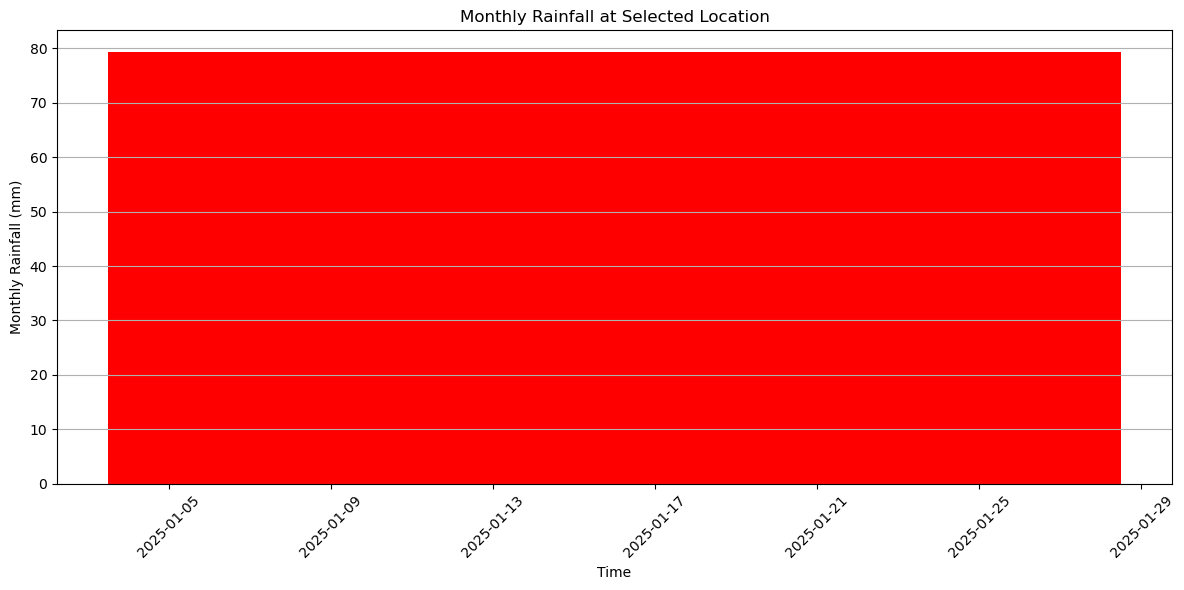

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming rainfall_location has a time dimension named "time"
time = rainfall_location['time']
rainfall_values = rainfall_location.values

# Define bar width as a timedelta of 25 days
bar_width = np.timedelta64(25, 'D')  # Adjust the number of days as needed

plt.figure(figsize=(12, 6))
plt.bar(time, rainfall_values, color='r', width=bar_width)
plt.xlabel('Time')
plt.ylabel('Monthly Rainfall (mm)')  # Adjust the unit if necessary
plt.title('Monthly Rainfall at Selected Location')
plt.grid(True, axis='y')  # Only show grid lines for the y-axis

# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [14]:
import fiona
import geopandas as gpd

print("Fiona version:", fiona.__version__)
print("GeoPandas version:", gpd.__version__)

Fiona version: 1.10.1
GeoPandas version: 0.14.4


## Extracting June Rainfall Data and Generating a Color-Mapped GeoTIFF
This Jupyter Notebook snippet demonstrates a two-step process to visualize June monthly rainfall data from a NetCDF file. First, it extracts the June time-slice (band 6) using gdal_translate, setting the appropriate nodata value and spatial reference system. Then, it converts the temporary NetCDF output to a color-mapped GeoTIFF using gdaldem color-relief, which applies a specified color ramp for enhanced visualization.

In [1]:
import subprocess

# Define the file paths
input_nc = "/home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/BOM_Jan_modified.nc"
tmp_nc = "tmp.nc"
clr_file = "/home/roddyb/projects/wheatbelt_rainfall_analyser/data/colormaps/monthly_rain.clr"
output_tif = "/home/roddyb/projects/wheatbelt_rainfall_analyser/data/interim/202501.BOMmonthly_rain.tif"

# Step 1: Extract the June time-slice using gdal_translate.
# For your monthly file, the 6th band corresponds to June.
translate_cmd = [
    "gdal_translate",
    input_nc,      # Source file
    tmp_nc,        # Temporary output file
    "-of", "NetCDF",
    "-ot", "Float32",
    "-b", "1",     # Extract band 6 (June)
    "-unscale",
    "-a_nodata", "-32765",  # Set nodata value (as per your file attributes)
    "-a_srs", "epsg:4326"    # Assign the WGS84 coordinate system
]

print("Running gdal_translate command...")
subprocess.run(translate_cmd, check=True)
print("gdal_translate completed.")

# Step 2: Convert the temporary NetCDF file to a GeoTIFF using gdaldem color-relief.
color_relief_cmd = [
    "gdaldem", "color-relief",
    tmp_nc,      # Input temporary NetCDF file
    clr_file,    # Color map file for monthly rainfall
    output_tif,  # Output GeoTIFF file
    "-of", "GTiff",
    "-alpha",
    "-nearest_color_entry",
    "-co", "COMPRESS=DEFLATE"
]

print("Running gdaldem color-relief command...")
subprocess.run(color_relief_cmd, check=True)
print("gdaldem color-relief completed. GeoTIFF saved to:", output_tif)


Running gdal_translate command...
Input file size is 886, 691
0...10...20...30...40...50...60...70...80...90...100 - done.
gdal_translate completed.
Running gdaldem color-relief command...
0...10...20...30...40...50...60...70...80...90...100 - done.
gdaldem color-relief completed. GeoTIFF saved to: /home/roddyb/projects/wheatbelt_rainfall_analyser/data/interim/202501.BOMmonthly_rain.tif


## Overlay with Australian States and SD Regions in Python
Use the following Python script to open the GeoTIFF and overlay it with the boundaries from your vector data. Adjust the file paths for your shapefiles accordingly.

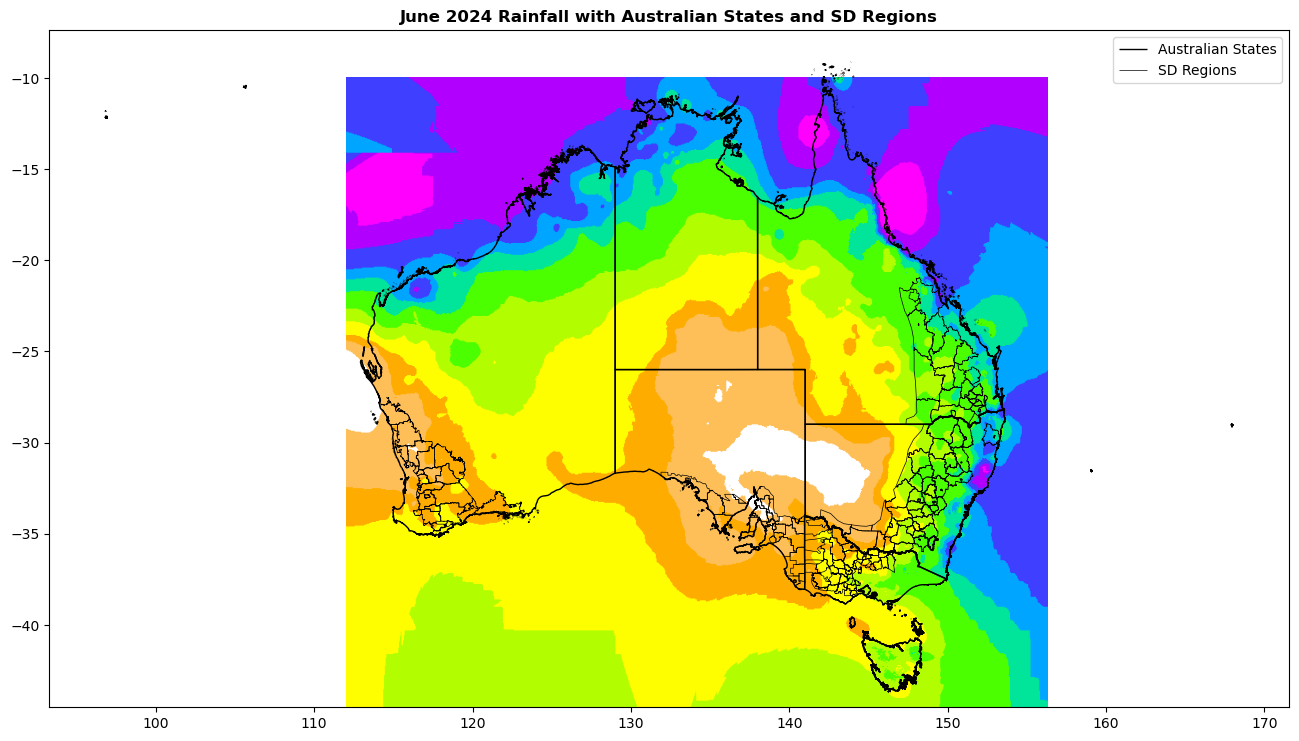

In [2]:
# Overlay with Australian States and SD Regions in Python
import rasterio
from rasterio.plot import show
import geopandas as gpd
import matplotlib.pyplot as plt

# Define paths to your data
geotiff_path = "/home/roddyb/projects/wheatbelt_rainfall_analyser/data/interim/202501.BOMmonthly_rain.tif"

# Update these paths to the location of your shapefiles
states_shp = "/home/roddyb/projects/wheatbelt_rainfall_analyser/data/shapefiles/STE_2021_AUST_GDA2020/STE_2021_AUST_GDA2020.shp"
sd_regions_shp = "/home/roddyb/projects/wheatbelt_rainfall_analyser/data/shapefiles/Australia_SA2_Wheat_clipped/Australia_SA2_Wheat_clipped.shp"

# Open the GeoTIFF using Rasterio
with rasterio.open(geotiff_path) as src:
    raster_crs = src.crs  # Get the coordinate reference system of the raster
    fig, ax = plt.subplots(figsize=(16, 12))
    show(src, ax=ax, title="June 2024 Rainfall with Australian States and SD Regions")

# Load the Australian states shapefile using GeoPandas
states = gpd.read_file(states_shp)

# Load the SD regions shapefile using GeoPandas
sd_regions = gpd.read_file(sd_regions_shp)

# Reproject vector data to match the raster CRS (if needed)
if states.crs != raster_crs:
    states = states.to_crs(raster_crs)
if sd_regions.crs != raster_crs:
    sd_regions = sd_regions.to_crs(raster_crs)

# Overlay the boundaries on the existing raster plot
states.boundary.plot(ax=ax, edgecolor="black", linewidth=1, label="Australian States")
sd_regions.boundary.plot(ax=ax, edgecolor="black", linewidth=0.5, label="SD Regions")

# Add a legend and display the plot
plt.legend()
plt.show()


## Goose suggestions

In [1]:
import xarray as xr
import os

nc_file = "/home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2025.monthly_rain.nc"

if not os.path.exists(nc_file):
    print(f"❌ File not found: {nc_file}")
else:
    try:
        with xr.open_dataset(nc_file) as dataset:
            print(f"✅ File found: {nc_file}")
            print(dataset)
    except IOError as e:
        print(f"❌ Error opening file: {e}")

✅ File found: /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2025.monthly_rain.nc
<xarray.Dataset> Size: 5MB
Dimensions:       (lat: 681, lon: 841, time: 1)
Coordinates:
  * lat           (lat) float64 5kB -44.0 -43.95 -43.9 ... -10.1 -10.05 -10.0
  * lon           (lon) float64 7kB 112.0 112.0 112.1 ... 153.9 153.9 154.0
  * time          (time) datetime64[ns] 8B 2025-01-16T12:00:00
Data variables:
    monthly_rain  (time, lat, lon) float64 5MB ...
    crs           |S1 1B ...
Attributes:
    department:               Department of Environment and Science
    department_short:         DES
    copyright:                Copyright - the State of Queensland Department ...
    site_url:                 http://www.longpaddock.qld.gov.au
    institution:              Queensland Government, Department of Environmen...
    raster_source:            Gridded surface was created by interpolating ob...
    raster_source_additions:  and other suppliers (see the SILO webpage for d...

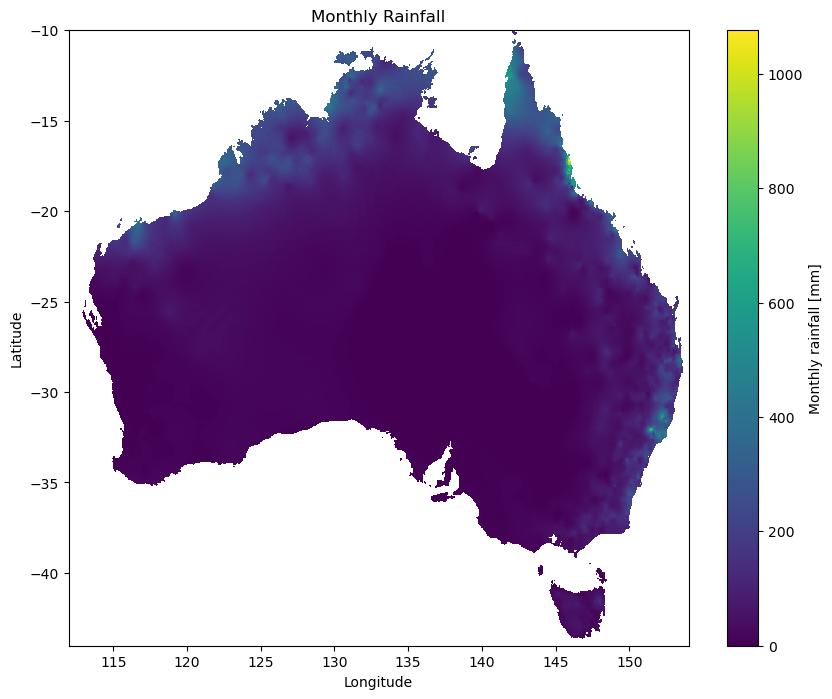

In [20]:
import matplotlib.pyplot as plt

rainfall = dataset["monthly_rain"]
plt.figure(figsize=(10, 8))
rainfall.plot(cmap="viridis")  # Choose an appropriate colormap
plt.title("Monthly Rainfall")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [28]:
lat, lon = -27.54, 151.91
tolerance = 0.1  # Adjust as needed

try:
    nearest_lat = dataset.lat.sel(lat=lat, method="nearest", tolerance=tolerance).values
    nearest_lon = dataset.lon.sel(lon=lon, method="nearest", tolerance=tolerance).values
    print(f"📍 Nearest Grid Point: Lat={nearest_lat}, Lon={nearest_lon}")

    rainfall_location = dataset.sel(lat=nearest_lat, lon=nearest_lon)["monthly_rain"]
    print(" Monthly Rainfall at Selected Location:")
    print(rainfall_location.values)
    print(rainfall_location)

except KeyError as e:
    print(f"❌ Coordinate selection failed: {e}")
except ValueError as e:
    print(f"❌ No coordinates found within tolerance: {e}")

📍 Nearest Grid Point: Lat=-27.55, Lon=151.9
 Monthly Rainfall at Selected Location:
[129.2  42.1  57.4  83.6  24.4  13.   32.   68.6  39.2  33.1 138.8 169. ]
<xarray.DataArray 'monthly_rain' (time: 12)> Size: 96B
array([129.2,  42.1,  57.4,  83.6,  24.4,  13. ,  32. ,  68.6,  39.2,  33.1,
       138.8, 169. ])
Coordinates:
    lat      float64 8B -27.55
    lon      float64 8B 151.9
  * time     (time) datetime64[ns] 96B 2024-01-16T12:00:00 ... 2024-12-16T12:...
Attributes:
    long_name:  Monthly rainfall
    units:      mm
    valid_min:  -32765
    valid_max:  32767


In [31]:
 #*Extract June Rainfall by Date:**

# Convert time to datetime objects if it's not already
dataset['time'] = dataset['time'].astype('datetime64[ns]')

# Select June data. Assumes time is in YYYY-MM-DD format
try:
    june_rainfall = dataset["monthly_rain"].sel(time=dataset["time"].dt.month == 6)
except KeyError as e:
    print(f"❌ Could not find the variable monthly_rain")
except IndexError as e:
    print(f"❌ No data for June found in this dataset.")


In [34]:
def average_yearly_nc(directory, output_file):
    """Averages yearly .nc files in a directory using cdo."""

    nc_files = [f for f in os.listdir(directory) if f.endswith(".nc")]
    if not nc_files:
        return "No .nc files found in the directory."

    input_files_str = " ".join([os.path.join(directory, f) for f in nc_files])
    output_path = os.path.join(directory, output_file)
    command = f"cdo avg {input_files_str} {output_path}"

    return command

directory = "/home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded"
output_file = "average_rainfall.nc"
cdo_command = average_yearly_nc(directory, output_file)
print(cdo_command)

cdo avg /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2019.monthly_rain.nc /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2021.monthly_rain.nc /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2015.monthly_rain.nc /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2022.monthly_rain.nc /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2014.monthly_rain.nc /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2018.monthly_rain.nc /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2025.monthly_rain.nc /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/bom_Jan.nc /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2023.monthly_rain.nc /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2020.monthly_rain.nc /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2024.monthly_rain.nc /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2016.monthly_ra

Current working directory: /home/roddyb/projects/wheatbelt_rainfall_analyser/notebooks
Successfully opened /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2024.monthly_rain.nc
<xarray.Dataset> Size: 55MB
Dimensions:       (lat: 681, lon: 841, time: 12)
Coordinates:
  * lat           (lat) float64 5kB -44.0 -43.95 -43.9 ... -10.1 -10.05 -10.0
  * lon           (lon) float64 7kB 112.0 112.0 112.1 ... 153.9 153.9 154.0
  * time          (time) datetime64[ns] 96B 2024-01-16T12:00:00 ... 2024-12-1...
Data variables:
    monthly_rain  (time, lat, lon) float64 55MB ...
    crs           |S1 1B ...
Attributes:
    department:               Department of Environment and Science
    department_short:         DES
    copyright:                Copyright - the State of Queensland Department ...
    site_url:                 http://www.longpaddock.qld.gov.au
    institution:              Queensland Government, Department of Environmen...
    raster_source:            Gridded surface w

### This code block opens two NetCDF files using the `xarray` library: '2024.monthly_rain.nc' and 'bom_Jan.nc'. It then checks if the 'bom_Jan.nc' dataset contains a variable named 'precip'. If it does, the code renames this variable to 'Monthly_rainfall' and saves the modified dataset to a new file na
### med 'bom_Jan_modified.nc' in the same directory. The code also prints the contents of the xarray datasets to the console for verification. Error handling is included to gracefully manage cases where the specified files are not found.

In [16]:
import xarray as xr
import os

# Define the file paths
file1_path = '/home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2024.monthly_rain.nc'
file2_path = '/home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/bom_Jan.nc'

print(f"Current working directory: {os.getcwd()}")

# Open the datasets
try:
    ds1 = xr.open_dataset(file1_path)
    print(f"Successfully opened {file1_path}")
    print(ds1)
except FileNotFoundError:
    print(f"Error: {file1_path} not found.")
    ds1 = None

try:
    ds2 = xr.open_dataset(file2_path)
    print(f"Successfully opened {file2_path}")
    print(ds2)
except FileNotFoundError:
    print(f"Error: {file2_path} not found.")
    ds2 = None

# Rename the variable in the second dataset if both datasets were opened
if ds1 is not None and ds2 is not None:
    if 'precip' in ds2.variables:
        ds2 = ds2.rename({'precip': 'Monthly rainfall'})
        ds2.to_netcdf('/home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/BOM_Jan_modified.nc') # Save modified file
        print("Renamed 'precip' to 'Monthly rainfall' and saved to /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/BOM_Jan_modified.nc")
    else:
        print("Variable 'precip' not found in bom_Jan.nc")

Current working directory: /home/roddyb/projects/wheatbelt_rainfall_analyser/notebooks
Successfully opened /home/roddyb/projects/wheatbelt_rainfall_analyser/data/gridded/2024.monthly_rain.nc
<xarray.Dataset> Size: 55MB
Dimensions:       (lat: 681, lon: 841, time: 12)
Coordinates:
  * lat           (lat) float64 5kB -44.0 -43.95 -43.9 ... -10.1 -10.05 -10.0
  * lon           (lon) float64 7kB 112.0 112.0 112.1 ... 153.9 153.9 154.0
  * time          (time) datetime64[ns] 96B 2024-01-16T12:00:00 ... 2024-12-1...
Data variables:
    monthly_rain  (time, lat, lon) float64 55MB ...
    crs           |S1 1B ...
Attributes:
    department:               Department of Environment and Science
    department_short:         DES
    copyright:                Copyright - the State of Queensland Department ...
    site_url:                 http://www.longpaddock.qld.gov.au
    institution:              Queensland Government, Department of Environmen...
    raster_source:            Gridded surface w